In [1]:
from satsearch import Search
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bbox = [-5917245.879650004,-5640033.790922457,-2492704.211660768,-2298390.47482543]
url = 'https://earth-search.aws.element84.com/v0'

In [3]:
bbox_search = Search(
    bbox=bbox,
    datetime="2021-01-01/2021-01-01",
    query={"eo:cloud_cover": {"lt": .01}},
    collections=["sentinel-s2-l2a-cogs"],
    url=url
)
items = bbox_search.items()
# print('Query returned {} items'.format(bbox_search.found()))
# print(items.summary())

In [4]:
from IPython.display import JSON
JSON(items[0].assets)

<IPython.core.display.JSON object>

### NDVI

In [5]:
# red
b4 = items[0].assets["B04"]["href"]
b4_open = rio.open(b4)
red = b4_open.read()

In [6]:
# nir
b8 = items[0].assets["B08"]["href"]
b8_open = rio.open(b8)
nir = b8_open.read()

In [7]:
# NDVI
a = nir.astype(float) - red.astype(float)
b = nir+red
ndvi = np.divide(a, b, out=np.zeros_like(a), where=b!=0)

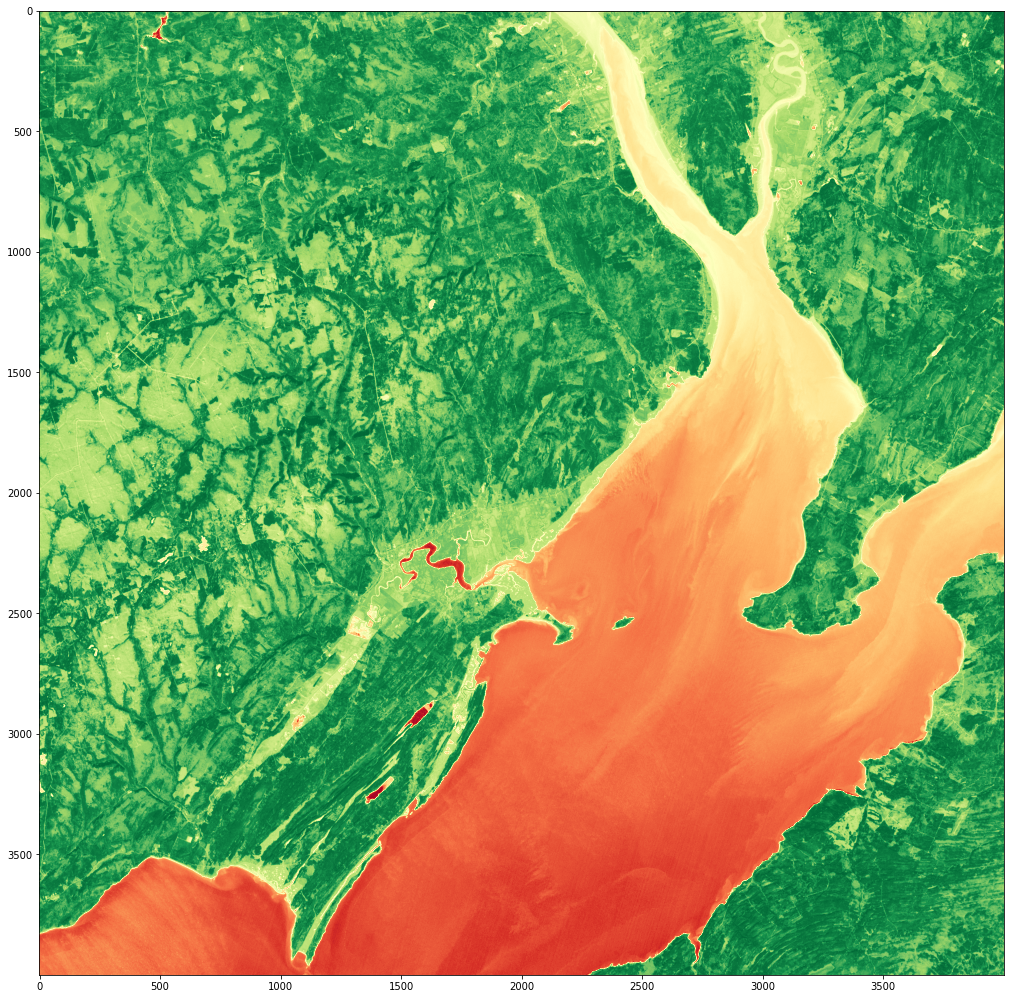

In [15]:
fig, ax = plt.subplots(figsize=(14,14))
show(ndvi [0,1000:5000, 5000:9000], cmap= "RdYlGn", ax=ax)
fig.tight_layout()
plt.show()